In [ ]:
import matplotlib
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.Utils import *
from GWGen.WFGenerator import *

In [ ]:
gwdir =  "/home/shaunf/Documents/Computer/Code/projects/ProcaAroundKerr/GWGenerator"
foldpath = gwdir+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
print([i for i in datframe.columns])
print("Length: {0}".format(len(datframe)))
print("SMBHMasses: {0}".format(datframe["SMBHMASS"].unique()))
print("e0: {0}".format(datframe["e0"].unique()))
print("BHSpins: {0}".format(datframe["BHSpin"].unique()))

In [ ]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,45)

In [ ]:
tmpdatframe = datframe[(datframe["e0"]==0.4)&(datframe["SMBHMASS"]==1e7)]
xdat = tmpdatframe["BHSpin"]
ydat = tmpdatframe["PROCAMASS"]
zdat = tmpdatframe["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xdat, np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Spin)")
ax.view_init(15,45)

In [ ]:
bhmass1 = 1e7
bhmass2 = 1e6
bhmass3 = 1e5
e0 = 0.6
bhspin = 0.6
newdat1 = datframe[(datframe["SMBHMASS"]==bhmass1)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat2 = datframe[(datframe["SMBHMASS"]==bhmass2)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat3 = datframe[(datframe["SMBHMASS"]==bhmass3)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat1 = newdat1.sort_values("PROCAMASS")
newdat2 = newdat2.sort_values("PROCAMASS")
newdat3 = newdat3.sort_values("PROCAMASS")

xdat1 = newdat1["PROCAMASS"].values
wdat1 = np.abs(newdat1["DeltaNOrbits"]).values
zdat1 = newdat1["faithfulness"].values
xdat2 = newdat2["PROCAMASS"].values
wdat2 = np.abs(newdat2["DeltaNOrbits"]).values
zdat2 = newdat2["faithfulness"].values
xdat3 = newdat3["PROCAMASS"].values
wdat3 = np.abs(newdat3["DeltaNOrbits"]).values
zdat3 = newdat3["faithfulness"].values


fig,ax = plt.subplots(1,2,figsize=(14,4))
#plt.subplots_adjust(hspace=0.5)
ax[0].plot(xdat1,wdat1,label="$M=10^7 M_{\odot}$",color='0.1');
inx =22
xarr = np.delete(xdat2[:-1],inx)
yarr = np.delete(wdat2[:-1],inx)
ax[0].plot(xarr, yarr,label="$M=10^6 M_{\odot}$",color='0.4')
#ax[0].plot(np.append(xdat2[:18],xdat2[20]), np.append(wdat2[:18],wdat2[20]),label="$M=10^6 M_{\odot}$",color='0.4')
inx1=15
inx2=inx1+5
#xarr = np.delete(np.append(xdat3[:inx1], xdat3[inx2:]),[-2,-3])
#yarr = np.delete(np.append(wdat3[:inx1], wdat3[inx2:]),[-2,-3])
#ax[0].plot(xarr, yarr,label="$M=10^5 M_{\odot}$",color='0.6')

ax[0].legend()
ax[0].set_yscale("log");
ax[0].set_xscale("log")
ax[0].set_ylabel("$\Delta N_{orbits}$")
ax[0].set_xlabel("$\mu$ (eV)")


ax[1].plot(xdat1,zdat1,label="$M=10^7 M_{\odot}$",color='0.1');
inx1=12
inx2=inx1+2
xarr = np.delete(xdat2,-17)
yarr = np.delete(zdat2,-17)
ax[1].plot(xarr, yarr,label="$M=10^6 M_{\odot}$",color='0.4')
#ax[1].plot(xdat3, zdat3, label="$M=10^5 M_{\odot}$",color="0.6")
ax[1].legend()
ax[1].set_xscale("log")
ax[1].set_ylabel("F")
ax[1].set_xlabel("$\mu$ (eV)")
ax[1].set_ylabel;


plt.savefig(gwdir+"/Data/AnalysisPlots/faith_Norbits_masses.png", dpi=1000, format="png",bbox_inches="tight")

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,4))
#plt.subplots_adjust(hspace=0.5)
#ax.plot(xdat1,wdat1,label="$M=10^7 M_{\odot}$",color='0.1');
inx =-17
xarr = np.delete(xdat2,inx)
yarr = np.delete(zdat2,inx)
ax.plot(xarr, yarr,label="$M=10^5 M_{\odot}$",color='0.4')
#ax[0].plot(np.append(xdat2[:18],xdat2[20]), np.append(wdat2[:18],wdat2[20]),label="$M=10^6 M_{\odot}$",color='0.4')
inx1=17
inx2=inx1+3
#ax.plot(np.append(xdat3[:inx1], xdat3[inx2:]), np.append(wdat3[:inx1], wdat3[inx2:]),label="$M=10^5 M_{\odot}$",color='0.6')
ax.legend()
ax.set_xscale("log")
ax.set_ylabel("$\Delta N_{orbits}/N_{orbits,vacuum}$")
ax.set_xlabel("$\mu$ (eV)")

In [ ]:
alpha1 = [alphavalue(bhmass1, i).value for i in xdat1]
alpha2 = [alphavalue(bhmass2, i).value for i in xdat2]
alpha3 = [alphavalue(bhmass3, i).value for i in xdat3]
plt.plot(alpha1, zdat1,label="M="+str(bhmass1)+"$M_{\odot}$")
plt.plot(alpha2, zdat2,label="M="+str(bhmass2)+"$M_{\odot}$")
plt.plot(alpha3, zdat3,label="M="+str(bhmass3)+"$M_{\odot}$")
plt.legend()

In [ ]:
e0list = datframe["e0"].unique()
bhspinlist = np.sort(datframe["BHSpin"].unique())
SMBHmasslist = np.sort(datframe["SMBHMASS"].unique())

datlist = cartesian_product(e0list, bhspinlist)

fig, axes = plt.subplots(len(datlist),2, figsize=(16,24))
plt.tight_layout()
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for inx, sub in enumerate(datlist):
    if inx==1:
        break
    subdatframe = datframe[(datframe["e0"]==sub[0])&(datframe["BHSpin"]==sub[1])]
    datframes = [subdatframe[subdatframe["SMBHMASS"]==i] for i in SMBHmasslist]
    procadata = [i["PROCAMASS"].values for i in datframes]
    inxsort_procadata = list(map(np.argsort, procadata))
    procadata = [procadata[i][inxsort_procadata[i]] for i in range(len(procadata))]
    faithdata = [datframes[i]["faithfulness"].values[inxsort_procadata[i]] for i in range(len(datframes))]
    orbitdata = [np.abs(datframes[i]["DeltaNOrbits"].values[inxsort_procadata[i]]) for i in range(len(datframes))]
    if len(procadata[0])==0 and len(procadata[1])==0:
        continue
    if sub[0]==0.6 and sub[1]==0.75:
        faithdata[0] = faithdata[0][:-2]
        orbitdata[0] = orbitdata[0][:-2]
        procadata[0] = procadata[0][:-2]
    
    [axes[inx,0].plot(procadata[i], faithdata[i],label=r"$M=10^{%s}$"%(int(np.log10(SMBHmasslist[i])))+" $M_{\odot}$") for i in range(len(datframes))]
    [axes[inx,1].plot(procadata[i], orbitdata[i],label=r"$M=10^{%s}$"%(int(np.log10(SMBHmasslist[i])))+" $M_{\odot}$") for i in range(len(datframes))]
    
    axes[inx,0].set_xscale("log")
    axes[inx,1].set_xscale("log")
    axes[inx,0].set_ylim(0,2)
    axes[inx,1].set_yscale("log")
    axes[inx,0].set_title("Faithfulness (e0={0}, a={1})".format(sub[0], sub[1], ))
    axes[inx,1].set_title(r"$\Delta N_{{orbits}}$ (e0={0}, a={1})".format(sub[0], sub[1]))
    axes[inx,0].set_xlabel("$\mu$ (eV)",loc="right",labelpad=-15)
    axes[inx,1].set_xlabel("$\mu$ (eV)",loc="right",labelpad=-15)

    axes[inx,0].legend()
    axes[inx,1].legend()
    plt.show()
#plt.savefig(gwdir+"/Data/AnalysisPlots/faith_Norbits_masses_all.png",dpi=100, format="png",bbox_inches="tight")

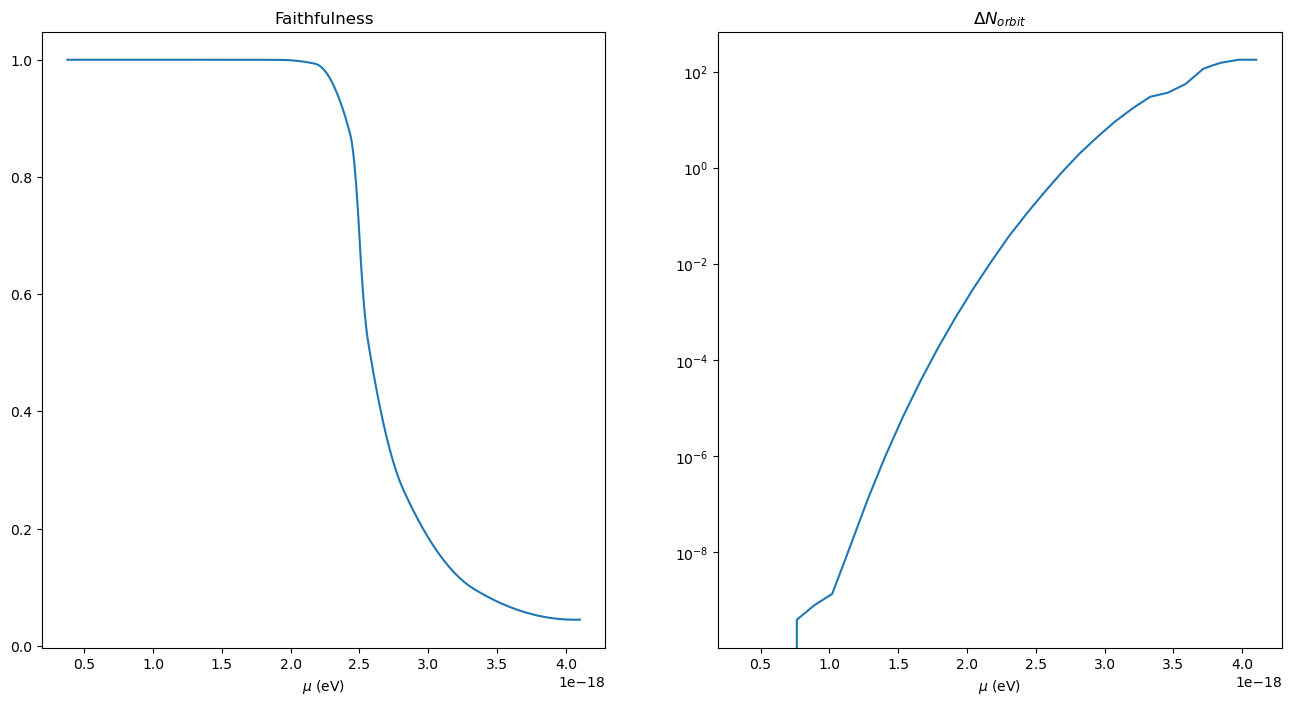

In [57]:
smbhmass = 1e7
e0 = 0.2
a = 0.9
sub_data = datframe[(datframe["SMBHMASS"]==smbhmass)&(datframe["e0"]==e0)&(datframe["BHSpin"]==a)].sort_values("PROCAMASS")
procadata = sub_data["PROCAMASS"].values
faith = sub_data["faithfulness"].values
norbit = np.abs(sub_data["DeltaNOrbits"]).values
fig,ax = plt.subplots(1,2,figsize=(16,8))
interp = sp.interpolate.UnivariateSpline(procadata, faith,k=2,s=0.003)
new_dom = np.linspace(procadata[0], procadata[-1],1000)
#ax[0].plot(procadata, faith)
ax[0].plot(new_dom, interp(new_dom))
ax[0].set_title("Faithfulness")
ax[0].set_xlabel("$\mu$ (eV)")
ax[1].plot(procadata, norbit)
ax[1].set_title("$\Delta N_{orbit}$")
ax[1].set_xlabel("$\mu$ (eV)")
ax[1].set_yscale("log")

In [ ]:
import superrad as SR
from superrad import ultralight_boson
ulb = ultralight_boson.UltralightBoson(spin=1, model="relativistic")
wv = ulb.make_waveform(M,0.9,m[10],units="physical")
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

M=1e7
m = np.arange(0.5*10**(-18), 5*10**(-18), 0.1*10**(-18))
for inx,mass in enumerate(m):
        if alphavalue(M,mass)>0.345:
            continue
        wv = ulb.make_waveform(M,0.9,mass,units="physical")
        timescale = wv.gw_time()
        times = np.arange(0,100*timescale,timescale/50)
        sectoyr = 1/(60*60*24*365)
        
        alphas.append(alphavalue(M,mass))
        initfluxs.append(wv.power_gw(100/sectoyr))
        timescales.append(timescale)
        plot1 = plt.loglog(times*sectoyr,wv.power_gw(times), label="M={0} alpha={1}".format(M,alphavalue(M,mass)));
        plt.xlabel("T (years)")
        plt.ylabel("P(t) (Watts)")
        plt.title("GW Flux ($M=10^{0}$)".format(int(np.log10(int(M))),alphavalue(M,mass)))
        #plt.legend(bbox_to_anchor=(1.8,1.0))
        plots1.append(plot1)

plt.annotate("alpha", (250,100),xytext=(300,50),arrowprops=dict(arrowstyle='->'),xycoords="axes points")
plt.savefig(gwdir+"/Data/AnalysisPlots/ProcaFlux.png", dpi=1000, format="png",bbox_inches="tight")
plt.show(block=False)

Ms = []
As = []
IFs = []
TSs = []

for i in [0,1,2]:
    M = 10**(7-i)
    m = np.arange(0.5*10**(-18+i), 5*10**(-18+i), 0.01*10**(-18+i))

    alphas = []
    initfluxs = []
    timescales = []
    for inx,mass in enumerate(m):

        if alphavalue(M,mass)>0.3386:
            continue
            
        wv = ulb.make_waveform(M,0.9,mass,units="physical")
        timescale = wv.gw_time()
        times = np.arange(0,1000*timescale,timescale/50)
        sectoyr = 1/(60*60*24*365)

        alphas.append(alphavalue(M,mass))
        initfluxs.append(wv.power_gw(100/sectoyr))
        timescales.append(timescale)
    
    Ms.append(M)
    As.append(alphas)
    IFs.append(initfluxs)
    TSs.append(timescales)

[plt.semilogy(As[i],IFs[i],label=r"$M=10^{%s} M_{\odot}$"%(int(np.log10(Ms[i])))) for i in range(len(Ms))]
plt.xlabel(r"$\alpha$")
plt.ylabel("P(t=0) (Watts)")
plt.legend()
plt.savefig(gwdir+"/Data/AnalysisPlots/InitalFluxes.png", dpi=1000, format="png",bbox_inches="tight")
plt.show(block=False)

fig,ax = plt.subplots()
ax.plot(np.transpose(As), np.transpose(TSs)*sectoyr,label=[r"$M=10^{%s} M_{\odot}$"%(int(np.log10(mm))) for mm in Ms])
ax.set_yscale('log')
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\tau_{GW}$ (years)")
ax.legend()
plt.savefig(gwdir+"/Data/AnalysisPlots/ProcaGWTimescales.png", dpi=1000, format="png",bbox_inches="tight")

plt.show(block=False)
